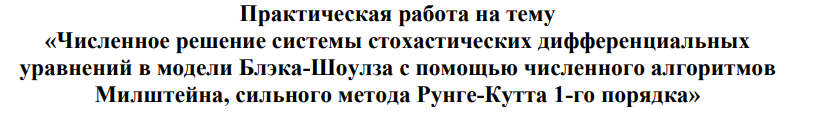

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Блэк-Шоулз

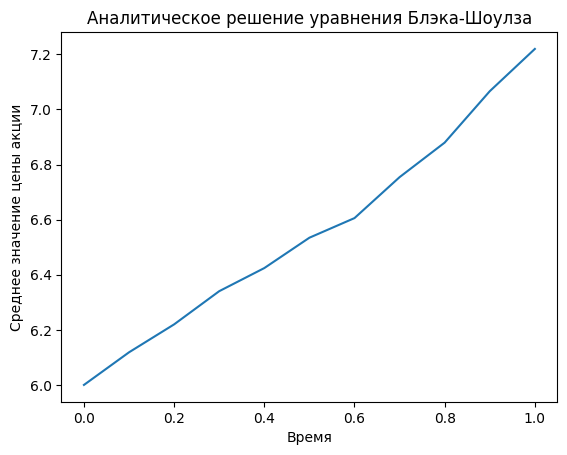

In [ ]:
S0 = 6
r = 0.15
sigma = 0.25
N = 10
dt = 0.1
M = 100

# создаем массивы для хранения результатов, где каждая строка соответствует очередной траектории
S = np.zeros((M, N+1))

# задаем начальные условия
S[:, 0] = S0

# определяем функцию, описывающую диффузионное уравнение
def f_bsh(S, t):
    return r * S

# определяем метод Блэка-Шоулза
for i in range(M):
    for j in range(N):
        dW = np.sqrt(dt) * np.random.normal()
        S[i, j+1] = S[i, j] + f_bsh(S[i, j], j*dt) * dt + sigma * S[i, j] * dW

# находим среднее значение траекторий на каждом шаге
mean_S = np.mean(S, axis=0)

# строим график зависимости среднего значения от времени
plt.plot(np.arange(N+1) * dt, mean_S)
plt.title('Аналитическое решение уравнения Блэка-Шоулза')
plt.xlabel('Время')
plt.ylabel('Среднее значение цены акции')
plt.show()



## Моделирование винеровского процесса

In [7]:
S0 = 6
K = 3
r = 0.15
sigma = 0.25
T = 1
n = 10
n_traj = 100
h = T/n

In [8]:
W = np.zeros((n_traj, n+1)) 

In [9]:
randn = np.random.normal(loc=0,scale=1,size=(n_traj,n)) * np.sqrt(h)
W[:,1:] = np.cumsum(randn, axis=1)

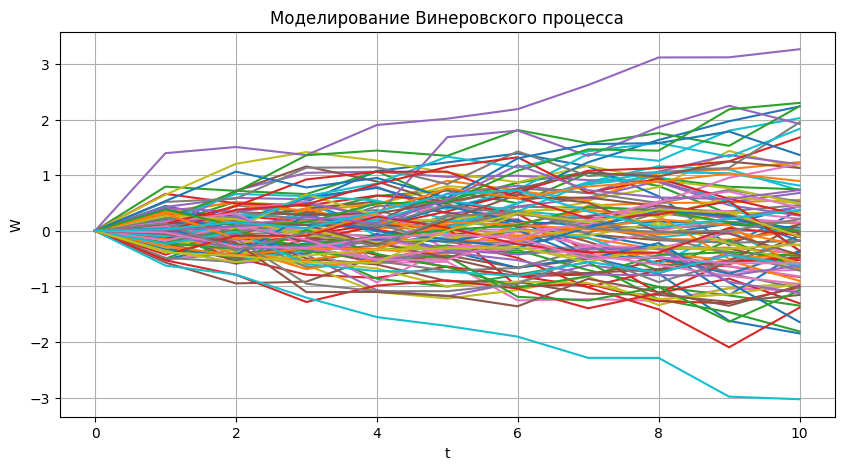

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

for i, traj in enumerate(W):
    ax.plot(np.arange(n+1), traj, label=f'Траектория {i}')
    
ax.set_xlabel('t')
ax.set_ylabel('W')
ax.grid()
ax.set_title('Моделирование Винеровского процесса');

# Реализация численных алгоритмов Милштейна, сильного метода Рунге-Кутта 1-го порядка, Эйлера-Маруяма и Блэка-Шоулза

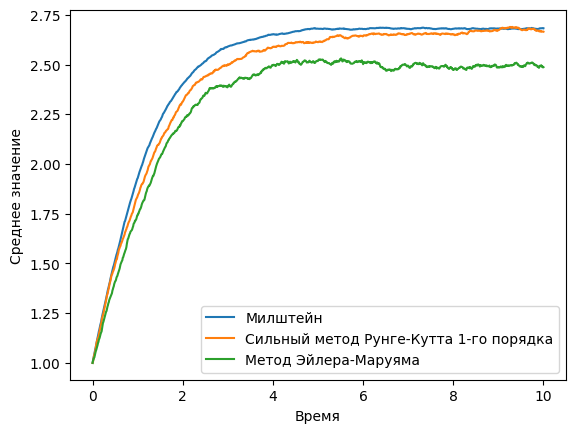

In [14]:
# задаем параметры модели: начальное значение x0, число шагов N,
# шаг по времени dt и число траекторий M
x0 = 1
N = 1000
dt = 0.01
M = 1000

# создаем массивы для хранения результатов, где каждая строка соответствует очередной траектории
x_milshtein = np.zeros((M, N+1))
x_rk = np.zeros((M, N+1))
x_euler = np.zeros((M, N+1))
x_bsh = np.zeros((M, N+1))

# задаем начальные условия
x_milshtein[:, 0] = x0
x_rk[:, 0] = x0
x_euler[:, 0] = x0

# определяем функцию, описывающую диффузионное уравнение для численных методов
def f(x):
    return np.sin(x)

# создаем массивы для хранения ошибок каждого метода
error_milshtein = np.zeros(M)
error_rk = np.zeros(M)
error_euler = np.zeros(M)

# определяем три численных метода:
# Милштейна, сильного метода Рунге-Кутта 1-го порядка и метода Эйлера-Маруяма
for i in range(M):
    for j in range(N):

        # Милштейн
        dW = np.sqrt(dt) * np.random.normal()
        x_milshtein[i, j+1] = x_milshtein[i, j] + f(x_milshtein[i, j]) * dt + 0.5 * f(x_milshtein[i, j]) * dW \
                                + 0.5 * (f(x_milshtein[i, j] + dW) - f(x_milshtein[i, j])) * dW
      
        # добавляем ошибку на каждой траектории
        # error_milshtein[i] = np.abs(x_milshtein[i, -1] - analytical_solution(T)) # решение из Блека Шоулза 

        # сильный метод Рунге-Кутта 1-го порядка
        dW = np.sqrt(dt) * np.random.normal()
        x_rk[i, j+1] = x_rk[i, j] + f(x_rk[i, j]) * dt + f(x_rk[i, j] + 0.5 * dW) * dW
        # error_rk[i] = np.abs(x_rk[i, -1] - analytical_solution(T))


        # метод Эйлера-Маруяма
        dW = np.sqrt(dt) * np.random.normal()
        x_euler[i, j+1] = x_euler[i, j] + f(x_euler[i, j]) * dt + dW
        # error_euler[i] = np.abs(x_euler[i, -1] - analytical_solution(T))
   
        
# находим среднее значение траекторий на каждом шаге
mean_x_milshtein = np.mean(x_milshtein, axis=0)
mean_x_rk = np.mean(x_rk, axis=0)
mean_x_euler = np.mean(x_euler, axis=0)
mean_x_bsh = np.mean(x_bsh, axis=0)


# строим графики зависимости среднего значения от времени для каждого метода
plt.plot(np.arange(N+1) * dt, mean_x_milshtein, label = 'Милштейн')
plt.plot(np.arange(N+1) * dt, mean_x_rk, label = 'Сильный метод Рунге-Кутта 1-го порядка')
plt.plot(np.arange(N+1) * dt, mean_x_euler, label = 'Метод Эйлера-Маруяма')

plt.legend()
plt.xlabel('Время')
plt.ylabel('Среднее значение')
plt.show();